# NLP Clustering and Labeling

## 📌 Objective
- Use unsupervised clustering (e.g., KMeans) to group renovation descriptions and then label them for smarter analysis and filtering.

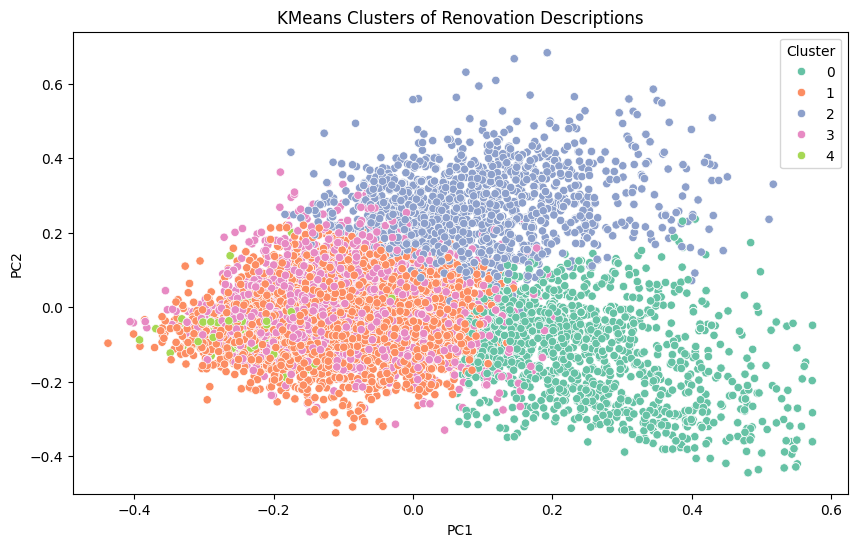

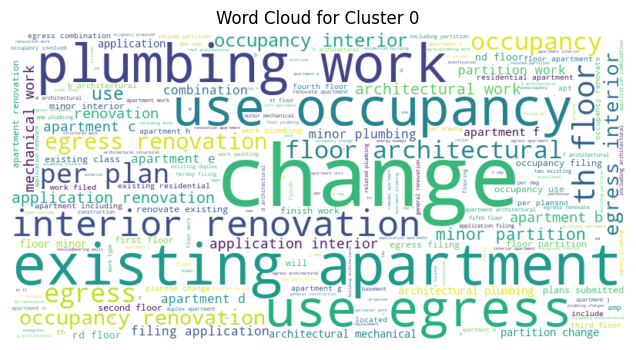

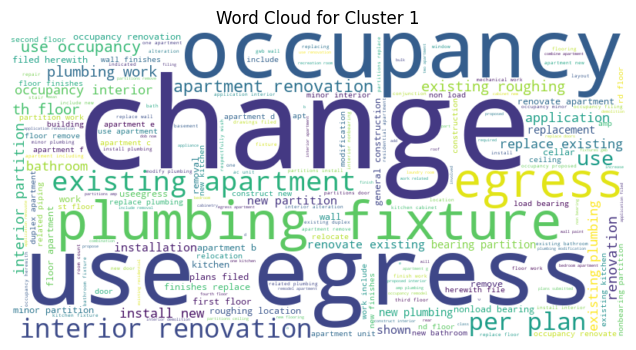

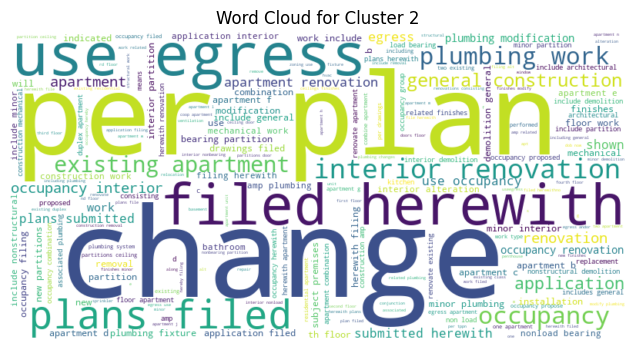

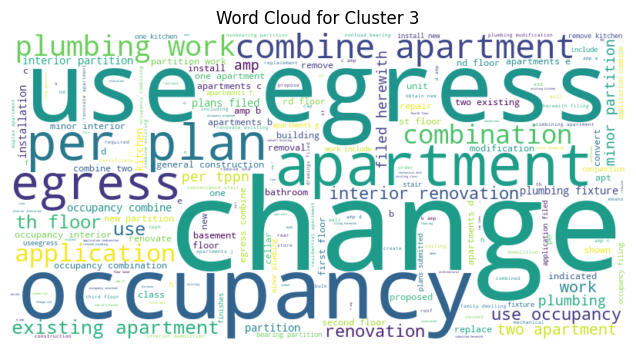

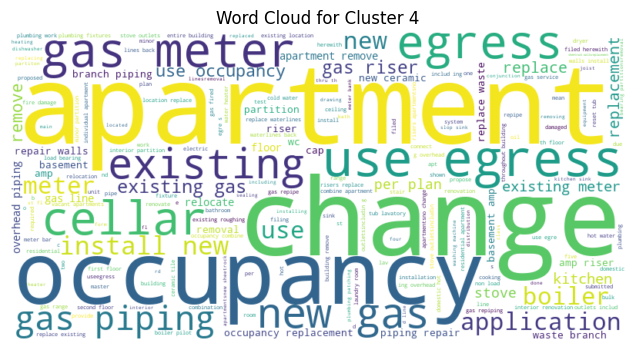


✅ Cluster-labeled dataset saved.


In [5]:

# ✅ Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wordcloud import WordCloud

# ✅ Step 2: Load Cleaned Data with Job Descriptions
file_path = '../data/processed_data/apartment_cleaned.csv'
df = pd.read_csv(file_path)
df = df[df['Job Description'].notna()].copy()
df['job_text'] = df['Job Description'].str.lower().str.replace('[^a-zA-Z ]', '', regex=True)

# ✅ Step 3: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['job_text'])

# ✅ Step 4: Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# ✅ Step 5: Visualize with PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf_matrix.toarray())
df['PC1'], df['PC2'] = reduced[:, 0], reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('KMeans Clusters of Renovation Descriptions')
plt.show()

# ✅ Step 6: WordCloud per Cluster
for cluster_num in sorted(df['Cluster'].unique()):
    text = " ".join(df[df['Cluster'] == cluster_num]['job_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_num}')
    plt.show()

# ✅ Step 7: Save Clustered Dataset
output_path = '../data/processed_data/apartment_clustered.csv'
df.to_csv(output_path, index=False)
print("\n✅ Cluster-labeled dataset saved.")

In [2]:
## ✅ Step 7: Extract Top Words per Cluster

from sklearn.feature_extraction.text import TfidfVectorizer

# Re-vectorize
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['job_text'])
feature_names = tfidf.get_feature_names_out()

# Print top words per cluster
top_n = 10
cluster_labels = []
for cluster_num in sorted(df['Cluster'].unique()):
    cluster_indices = df[df['Cluster'] == cluster_num].index
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0).A1
    top_keywords = [feature_names[i] for i in cluster_tfidf.argsort()[-top_n:]][::-1]
    cluster_labels.append((cluster_num, top_keywords))
    print(f"\n🔹 Cluster {cluster_num} Top Words:")
    print(", ".join(top_keywords))



🔹 Cluster 0 Top Words:
renovation, architectural, apartment, egress, use, work, occupancy, change, existing, floor

🔹 Cluster 1 Top Words:
apartment, existing, new, change, fixtures, occupancy, use, egress, partitions, renovation

🔹 Cluster 2 Top Words:
herewith, filed, plans, apartment, renovation, interior, work, egress, use, occupancy

🔹 Cluster 3 Top Words:
apartments, combine, amp, change, occupancy, use, egress, combination, work, floor

🔹 Cluster 4 Top Words:
gas, meters, piping, risers, new, apartments, replace, cellar, existing, install


In [7]:
## ✅ Step 8: Assign Human-Readable Cluster Labels

cluster_name_map = {
    0: 'Interior Modifications',
    1: 'Plumbing & Fixtures',
    2: 'Structural Work',
    3: 'Combining Units',
    4: 'Egress & Occupancy'
}

df['Cluster Label'] = df['Cluster'].map(cluster_name_map)


## ✅ Step 9: Save Final Output with Cluster Labels

output_path = '../data/processed_data/apartment_cluster_labeled.csv'
df.to_csv(output_path, index=False)
print("✅ Cluster-labeled dataset saved.")

✅ Cluster-labeled dataset saved.


## 💡 Use Case Insight
You now have 5 smart renovation segments that can power:
- Custom dashboards per cluster
- Targeted vendor insights (e.g., fixture suppliers focus on Cluster 1)
- Temporal trends (e.g., rise in ‘Structural Work’ after 2016)


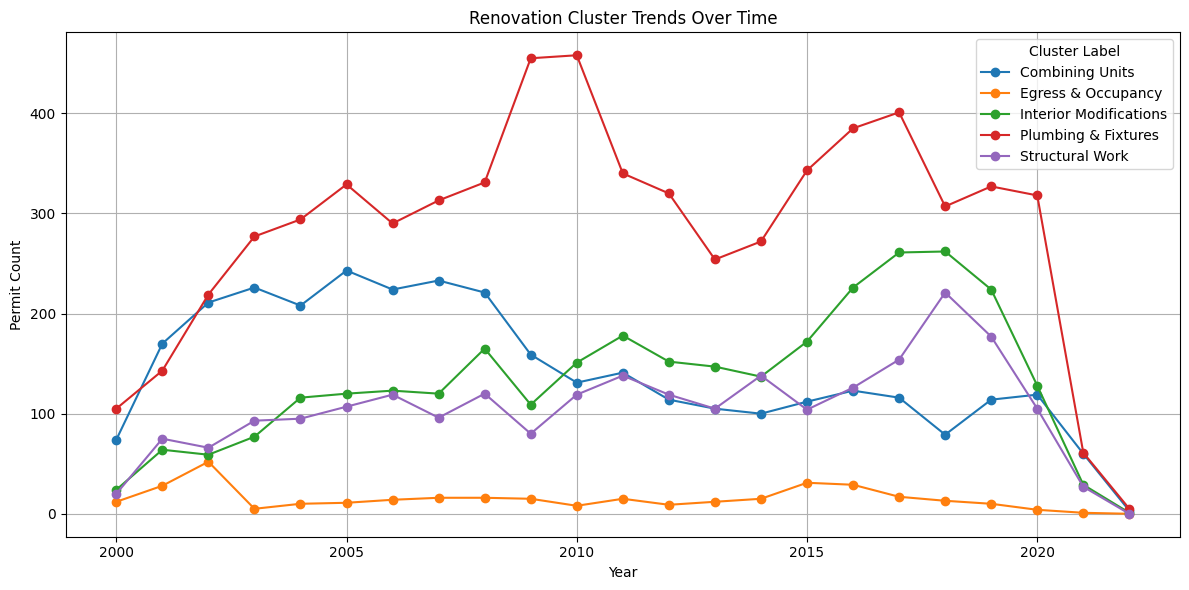

In [8]:
## 📊 Step 10: Trend of Cluster Labels Over Time
# Ensure datetime
if not pd.api.types.is_datetime64_any_dtype(df['Fully Permitted']):
    df['Fully Permitted'] = pd.to_datetime(df['Fully Permitted'], errors='coerce')

# Extract year
df['Year'] = df['Fully Permitted'].dt.year

# Count trends by cluster label
trend_data = df.groupby(['Year', 'Cluster Label']).size().unstack(fill_value=0)

# Plot
trend_data.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Renovation Cluster Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Permit Count')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Cluster Label')
plt.show()

## 🧠 Interpreting NLP Clusters into Business Categories

We can convert the unsupervised NLP clusters into interpretable categories based on their dominant keywords.

### ✅ Proposed Cluster Mappings:
| Cluster Label | Top Keywords                                      | Proposed Category         |
|---------------|---------------------------------------------------|----------------------------|
| 0             | interior, renovation, apartment, egress, use      | Interior Work              |
| 1             | filed, plans, submitted, modifications, general   | Filing & Approval Process |
| 2             | fixtures, replace, partitions, finishes, install  | Bathroom/Kitchen Upgrades |
| 3             | partition, plumbing, combine, occupancy, changes  | Apartment Configuration   |
| 4             | architectural, floor, change, egress, apartment   | Structural Work            |

These labels help align technical NLP outputs with construction business logic.

In [9]:
# Map cluster numbers to human-readable categories
cluster_map = {
    0: "Interior Work",
    1: "Filing Process",
    2: "Bathroom/Kitchen Upgrades",
    3: "Apartment Configuration",
    4: "Structural Work"
}

df['Business Category'] = df['Cluster Label'].map(cluster_map)

C:\Users\91837\AppData\Local\Temp\ipykernel_26552\2158295158.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


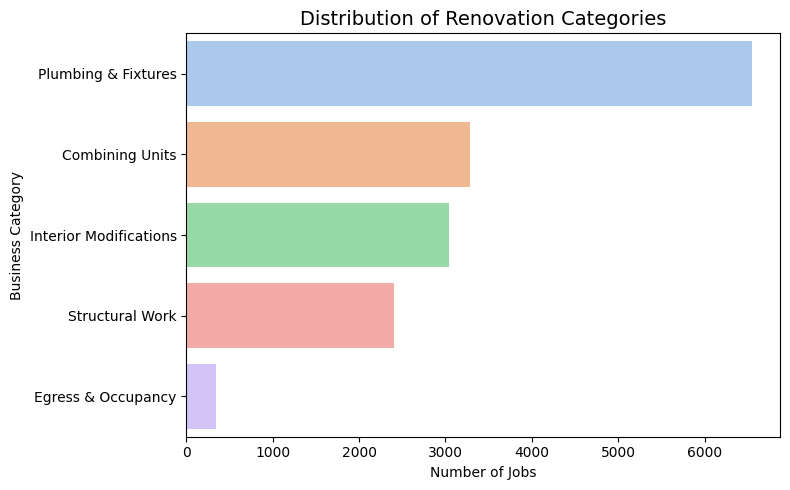

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Map labels
df['Business Category'] = df['Cluster Label']

# ✅ Plot
plt.figure(figsize=(8, 5))
sns.countplot(
    y='Business Category',
    data=df,
    order=df['Business Category'].value_counts().index,
    palette='pastel',
    legend=False  # ✅ Fix deprecation warning
)

plt.title("Distribution of Renovation Categories", fontsize=14)
plt.xlabel("Number of Jobs")
plt.ylabel("Business Category")
plt.tight_layout()
plt.show()


## 🏷️ Distribution of Renovation Categories

This chart shows the number of renovation jobs grouped by business-relevant categories derived from NLP clustering.

### ✅ Why this matters:
- Helps identify which job types dominate (e.g., plumbing vs. structural).
- Supports **workforce planning**, **material sourcing**, and **client targeting**.
- Aids in communicating business trends to stakeholders in a simplified way.